# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Gadis Mustika
- **Email:** gadismustika21@gmail.com
- **ID Dicoding:** gadis_mustika

## Menentukan Pertanyaan Bisnis

- Bagaimana trend rata-rata peminjaman sepeda pada tahun 2011 dan 2012?
- Bagaimana kondisi musim dan cuaca dapat mempengaruhi rata-rata pengguna sepeda per harinya?
- Pada hari apa jumlah peminjaman sepeda melonjak tinggi?
- Kapan waktu meningkat peminjaman sepeda yang terjadi dalam satu hari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# load day dataset in analytics bikesharing
days_df = pd.read_csv("data/day.csv")
days_df.sample(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
27,28,2011-01-28,1,0,1,0,5,1,2,0.203478,0.223317,0.793043,0.123300,38,1129,1167
460,461,2012-04-05,2,1,4,0,4,1,1,0.435000,0.431163,0.374167,0.219529,1192,5265,6457
147,148,2011-05-28,2,0,5,0,6,0,1,0.655833,0.612379,0.729583,0.230092,2001,2757,4758
434,435,2012-03-10,1,1,3,0,6,0,1,0.287500,0.277767,0.350417,0.225750,968,3150,4118
101,102,2011-04-12,2,0,4,0,2,1,2,0.502500,0.493054,0.739167,0.274879,257,1777,2034
132,133,2011-05-13,2,0,5,0,5,1,2,0.512500,0.494300,0.863333,0.179725,692,3413,4105
338,339,2011-12-05,4,0,12,0,1,1,2,0.385833,0.393925,0.827083,0.062208,233,3578,3811
698,699,2012-11-29,4,1,11,0,4,1,1,0.280870,0.298422,0.555652,0.115522,243,5080,5323
10,11,2011-01-11,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263
633,634,2012-09-25,4,1,9,0,2,1,1,0.550000,0.544179,0.570000,0.236321,845,6693,7538


**Insight:**
- Data diambil pada tahun 2011 dan 2012
- Pada dataset day in terdiri dari:
  - instant (index)
  - dtday (tanggal)
  - season (musim)
  - yr (tahun)
  - mnth (bulan)
  - holiday (liburan)
  - weekday (hari)
  - workingday(menentukan hari kerja=1 atau libur=0)
  - weathersit(kondisi cuaca)
  - temp (suhu asli)
  - atemp (suhu terasa/samar")
  - hum (kelempaban)
  - windspeed (kecepatan angin)
  - casual (pengguna kasual/biasa)
  - registered (pengguna terdaftar/anggota)
  - count (jumlah pengguna sepeda)

- Data days terdiri dari : 731

In [3]:
# load hour dataset in analytics bikesharing
hours_df = pd.read_csv("data/hour.csv")
hours_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Data diambil pada tahun 2011 dan 2012
- Pada dataset hour terdiri dari:
  - instant (index)
  - dtday (tanggal)
  - season (musim)
  - yr (tahun)
  - mnth (bulan)
  - hr (waktu)
  - holiday (liburan)
  - weekday (hari)
  - workingday(menentukan hari kerja=1 atau libur=0)
  - weathersit(kondisi cuaca)
  - temp (suhu asli)
  - atemp (suhu terasa/samar")
  - hum (kelempaban)
  - windspeed (kecepatan angin)
  - casual (pengguna kasual/biasa)
  - registered (pengguna terdaftar/anggota)
  - count (jumlah pengguna sepeda)

- Data hour terdiri dari : 17.379

### Assessing Data

In [4]:
# Assesing value each columns in dataset day
days_df.info()
days_df.isna().sum()

# Checking duplicated data
print("Jumlah data duplikat:", days_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah data duplikat: 0


In [5]:
days_df.describe() # Checking summary statistik

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
# Assesing value each columns in hours dataset
hours_df.info() # checking missing value

print("Jumlah data duplikat:", hours_df.duplicated().sum()) # checking duplicate data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah data duplikat: 0


**Insight:**
- Tidak ada missing value pada dataset Day dan Hour
- Tidak ada duplikat data pada dataset Day dan Hour
- Berdasarkan summary statistik nilai semua normal pada dataset Day dan Hour
- Pada kolom dtday pada dataset day dan hour perlu diubah tipe data, dari objek ke datetime

### Cleaning Data

In [7]:
# Ubah tipe data pada kolom dtday pada dataset Day
days_df["dteday"] = pd.to_datetime(days_df["dteday"])

days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
# Ubah tipe data pada kolom dtday pada dataset Hour
hours_df["dteday"] = pd.to_datetime(hours_df["dteday"])

hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
 Tipe data pada kolom dteday di dataset Hour dan Days sudah diubah

## Exploratory Data Analysis (EDA)

### Explore  days_df

In [9]:
# Rata-rata peminjaman sepeda harian berdasarkan musim

# Ubah nama kolom pada dataset days
days_df.rename(columns={
    "dteday" : "datetime",
    "cnt" : "rent_count"
}, inplace=True)

days_df.head()

,instant,datetime,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,rent_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
days_df["season"] = pd.Categorical(
    days_df["season"].replace({1:"Spring", 2: "Summer", 3: "Autumn", 4: "Winter"}), categories=["Spring", "Summer", "Autumn", "Winter"]
)

days_df.sample(10)

,instant,datetime,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,rent_count
24,25,2011-01-25,Spring,0,1,0,2,1,2,0.223478,0.234526,0.616957,0.129796,186,1799,1985
127,128,2011-05-08,Summer,0,5,0,0,0,1,0.528333,0.518933,0.631667,0.074637,1401,2932,4333
494,495,2012-05-09,Summer,1,5,0,3,1,2,0.575000,0.553025,0.744167,0.216412,620,4097,4717
273,274,2011-10-01,Winter,0,10,0,6,0,2,0.410000,0.412863,0.753750,0.292296,480,1949,2429
104,105,2011-04-15,Summer,0,4,1,5,0,1,0.446667,0.441913,0.671250,0.226375,642,2484,3126
284,285,2011-10-12,Winter,0,10,0,3,1,3,0.543333,0.517717,0.906250,0.248150,217,2199,2416
345,346,2011-12-12,Winter,0,12,0,1,1,1,0.238333,0.270196,0.670833,0.063450,143,3167,3310
437,438,2012-03-13,Spring,1,3,0,2,1,1,0.565000,0.542929,0.617500,0.236950,762,5085,5847
708,709,2012-12-09,Winter,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441,2787,3228
629,630,2012-09-21,Autumn,1,9,0,5,1,1,0.599167,0.571971,0.668750,0.154229,1250,6917,8167


In [11]:
days_df.groupby(['season'], observed=True)["rent_count"].agg(['mean'])

,mean
season,
Spring,2604.132597
Summer,4992.331522
Autumn,5644.303191
Winter,4728.162921


**Insight:**
- Rata-rata terbesar peminjaman sepeda, pada musim: gugur dan panas
- Menariknya pada musim dingin penggunaan sepeda jauh lebih besar dibandingkan dengan musim semi


In [12]:
# Peminjaman berdasarkan faktor cuaca
days_df.rename(columns={
    "weathersit" : "weathersituation",
}, inplace=True)

days_df["weathersituation"] = pd.Categorical(
    days_df["weathersituation"].replace({1:"Sunny", 2: "Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Thunderstorm"}), categories=["Sunny", "Cloudy", "Light Rain/Snow", "Heavy Rain/Thunderstorm"]
)


days_df.groupby(["weathersituation"], observed=True).agg({
    "casual" : "sum",
    "registered" : "sum",
    "rent_count" : "sum"
})


,casual,registered,rent_count
weathersituation,,,
Sunny,446346,1811606,2257952
Cloudy,169776,827082,996858
Light Rain/Snow,3895,33974,37869


**Insight**:
Pengguna kebanyakan menggunakan sepeda pada saat cuaca cerah, namun Tidak ada sama sekali pengguna sepeda ketika cuaca buruk/ekstrim seperti badai dan curah hujan lebat.

In [13]:
# Jumlah dan Rata-rata peminjaman sepeda dalam seminggu
days_df["weekday"] = pd.Categorical(
    days_df["weekday"].replace({0:"Sunday",1:"Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}), categories=["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
)


days_df.groupby('weekday').agg({
    "registered" : ["sum", "mean"],
    "casual" : ["sum", "mean"],
    "rent_count": ["sum", "mean"]
})

C:\Users\HP\AppData\Local\Temp\ipykernel_15864\1628764493.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby('weekday').agg({


registered               casual              rent_count             
                 sum         mean     sum         mean        sum         mean
weekday                                                                       
Sunday        303506  2890.533333  140521  1338.295238     444027  4228.828571
Monday        384719  3663.990476   70784   674.133333     455503  4338.123810
Tuesday       411266  3954.480769   57843   556.182692     469109  4510.663462
Wednesday     415729  3997.394231   57319   551.144231     473048  4548.538462
Thursday      423935  4076.298077   61460   590.961538     485395  4667.259615
Friday        409552  3938.000000   78238   752.288462     487790  4690.288462
Saturday      323955  3085.285714  153852  1465.257143     477807  4550.542857

In [14]:
# Peminjaman sepeda berdasarkan hari kerja
days_df.groupby('workingday').agg({
    "registered" : ["sum", "mean"],
    "casual" : ["sum", "mean"],
    "rent_count": ["sum", "mean"]
})

registered               casual              rent_count  \
                  sum         mean     sum         mean        sum   
workingday                                                           
0              683537  2959.034632  316732  1371.134199    1000269   
1             1989125  3978.250000  303285   606.570000    2292410   

                         
                   mean  
workingday               
0           4330.168831  
1           4584.820000

**Insight**:
- Rata-rata dan jumlah peminjaman sepeda meningkat di hari jum'at
- Pada hari kerja pengguna terdaftar (registered) meningkat, terutama di hari Rabu dan Kamis
- Sedangkan di hari libur pengguna biasa (casual) meningkat terutama pada hari Sabtu

In [15]:
# Trend peminjaman sepeda bulanan di tahun 2011 dan 2012
days_df.rename(columns={
    "mnth" : "month"
}, inplace=True)


days_df['year'] = days_df['yr'].apply(lambda x: 2011 if x == 0 else 2012)

monthly_trend = days_df.groupby(["year", "month"], observed=True).agg({
    "rent_count": ["mean", "sum"]
})

monthly_trend

rent_count        
                   mean     sum
year month                     
2011 1      1231.903226   38189
     2      1721.964286   48215
     3      2065.967742   64045
     4      3162.333333   94870
     5      4381.322581  135821
     6      4783.733333  143512
     7      4559.387097  141341
     8      4409.387097  136691
     9      4247.266667  127418
     10     3984.225806  123511
     11     3405.566667  102167
     12     2816.870968   87323
2012 1      3120.774194   96744
     2      3556.448276  103137
     3      5318.548387  164875
     4      5807.466667  174224
     5      6318.225806  195865
     6      6761.000000  202830
     7      6567.967742  203607
     8      6919.451613  214503
     9      7285.766667  218573
     10     6414.225806  198841
     11     5088.800000  152664
     12     3990.741935  123713

In [16]:
# Trend musim peminjaman sepeda di tahun 2011 dan 2012
seasonal_trend = days_df.groupby(["year", "season", "weathersituation"], observed=True).agg({
    "rent_count": ["mean", "sum"]
})

seasonal_trend

rent_count        
                                     mean     sum
year season weathersituation                     
2011 Spring Sunny             1777.410714   99535
            Cloudy            1541.750000   49336
            Light Rain/Snow    564.500000    1129
     Summer Sunny             4236.980769  220323
            Cloudy            3276.657895  124513
            Light Rain/Snow   1240.000000    2480
     Autumn Sunny             4684.090909  309150
            Cloudy            4158.080000  103952
            Light Rain/Snow   2182.666667    6548
     Winter Sunny             3962.673077  206059
            Cloudy            3624.931034  105123
            Light Rain/Snow   1869.375000   14955
2012 Spring Sunny             3863.654545  212501
            Cloudy            3124.617647  106237
            Light Rain/Snow   1305.000000    2610
     Summer Sunny             6666.606557  406663
            Cloudy            5452.766667  163583
            Light Rain/Snow   1027.000000    1027
     Autumn Sunny             7004.185714  490293
            Cloudy            6379.434783  146727
            Light Rain/Snow   4459.000000    4459
     Winter Sunny             6145.647059  313428
            Cloudy            5482.972222  197387
            Light Rain/Snow   2330.500000    4661

**Insight**:

Peminjaman tahun 2011
- Mengalami peningkatan secara bertahap selama 2 kuartal namun, mengalami penurunan 2 kuartal terakhir sebesar 75%
- Rata-rata peminjaman tertinggi pada bulan ke-6 tahun 2011
- Kebanyakan orang meminjam sepeda pada musim gugur dan panas

Peminjaman tahun 2012:
- Mengalami peningkatan besar dari bulan pertama hingga ke-sembilan sebesar 80%  atau 3 kuartal.
- Tetapi pada 3 bulan terakhir di tahun 2012 mengalami turun drastis sebesar 60%
- Peminjaman terbanyak pada saat musim gugur dan panas, namun di tahun 2012 pada saat musim dingin ini peminjaman sepeda tak kalah banyak.

In [17]:
# Menyimpan file yang sudah di clean dan dieksplorasi
main_days_df = days_df

### Explore hours_df

In [18]:
# Faktor iklim dalam penggunaan sepeda/jam
hours_df.rename(columns={
    "cnt" : "rent_count",
    "hum" : "humidity"
}, inplace=True)

min_temp = 0
max_temp = 30

hours_df["temp_in_celsius"] = (hours_df["temp"] * (max_temp - min_temp) + min_temp)# Konversi suhu dari nomalisasi menjadi celsius

hours_df["humidity_percent"] = hours_df["humidity"] * 100

hours_df["windspeed_mps"] = hours_df["windspeed"] * hours_df["windspeed"].max()


hours_df.groupby(["temp_in_celsius", "humidity_percent", "windspeed_mps"], observed=True).agg({
    "rent_count" : ["mean","sum"]
})

hours_df.rank()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,rent_count,temp_in_celsius,humidity_percent,windspeed_mps
0,1.0,12.5,2121.5,4323.0,715.0,363.5,8440.0,16123.5,2757.5,5707.0,1752.5,2988.5,13549.0,1090.5,3810.0,2602.0,2601.0,1752.5,13549.0,1090.5
1,2.0,12.5,2121.5,4323.0,715.0,1088.5,8440.0,16123.5,2757.5,5707.0,1281.0,2572.5,13358.0,1090.5,6270.0,4210.0,4348.5,1281.0,13358.0,1090.5
2,3.0,12.5,2121.5,4323.0,715.0,1808.0,8440.0,16123.5,2757.5,5707.0,1281.0,2572.5,13358.0,1090.5,4974.0,3855.5,3863.5,1281.0,13358.0,1090.5
3,4.0,12.5,2121.5,4323.0,715.0,2514.0,8440.0,16123.5,2757.5,5707.0,1752.5,2988.5,12073.5,1090.5,3810.0,2259.0,2306.0,1752.5,12073.5,1090.5
4,5.0,12.5,2121.5,4323.0,715.0,3211.0,8440.0,16123.5,2757.5,5707.0,1752.5,2988.5,12073.5,1090.5,791.0,125.0,79.5,1752.5,12073.5,1090.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375.0,17367.5,2121.5,13012.5,16638.0,14103.5,8440.0,3742.0,11447.0,13685.5,2293.0,2163.5,7847.0,7808.0,7281.0,8291.0,7798.0,2293.0,7847.0,7808.0
17375,17376.0,17367.5,2121.5,13012.5,16638.0,14831.5,8440.0,3742.0,11447.0,13685.5,2293.0,2163.5,7847.0,7808.0,6270.0,6867.5,6563.0,2293.0,7847.0,7808.0
17376,17377.0,17367.5,2121.5,13012.5,16638.0,15559.5,8440.0,3742.0,11447.0,5707.0,2293.0,2163.5,7847.0,7808.0,5879.0,6973.0,6614.5,2293.0,7847.0,7808.0
17377,17378.0,17367.5,2121.5,13012.5,16638.0,16287.5,8440.0,3742.0,11447.0,5707.0,2293.0,2572.5,6797.5,6091.5,7866.5,5132.5,5352.5,2293.0,6797.5,6091.5


**Insight**: Mayoritas pengguna ingin memakai sepeda pada saat temperature tinggi,presentase kelembapan sedang,dan kecepatan angin rendah

In [19]:
# Trend waktu peminjaman sepeda perharinya
hours_df.rename(columns={
      "dteday" : "datetime",
      "hr" : "hour"
}, inplace=True)



hourly_trend = hours_df.groupby(["hour", "workingday"], observed=True).agg({
    "rent_count" : {"mean", "sum" }
})

hourly_trend

rent_count            
                       sum        mean
hour workingday                       
0    0               20884   90.800000
     1               18246   36.786290
1    0               15987   69.508696
     1                8177   16.552632
2    0               12123   53.171053
     1                4229    8.683778
3    0                5851   25.775330
     1                2323    4.942553
4    0                1876    8.264317
     1                2552    5.429787
5    0                1929    8.689189
     1               12332   24.913131
6    0                4292   18.742358
     1               50840  102.500000
7    0               10027   43.406926
     1              144144  290.612903
8    0               24406  105.653680
     1              236595  477.006048
9    0               39645  171.623377
     1              119793  241.518145
10   0               59115  255.909091
     1               67142  135.366935
11   0               72838  315.316017
     1               78482  158.229839
12   0               84606  366.259740
     1               99808  200.820926
13   0               86101  372.731602
     1               98818  198.429719
14   0               84233  364.645022
     1               91419  183.572289
15   0               82886  358.813853
     1              100263  201.331325
16   0               81480  352.727273
     1              146268  293.122244
17   0               74740  323.549784
     1              262120  525.290581
18   0               64643  281.056522
     1              245129  492.226908
19   0               53285  231.673913
     1              173504  348.401606
20   0               40190  174.739130
     1              124360  249.718876
21   0               32674  142.060870
     1               92771  186.287149
22   0               26694  116.060870
     1               68918  138.389558
23   0               19764   85.930435
     1               44177   88.708835

**Insight**:
- Waktu peminjaman sepeda di hari biasa umumnya pada jam sibuk yaitu (06.00-18.00)
- pada bukan hari biasa/libur, ada 3 pembagian waktu peminjaman sepeda meningkat, yaitu:
 - (00.00-02.00)
 - (10.00-16.00)
 - (17.00-19.00)

In [20]:
# simpan dataset hours_df yang sudah di clean dan explore
main_hours_df = hours_df

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend rata-rata peminjaman sepeda pada tahun 2011 dan 2012?

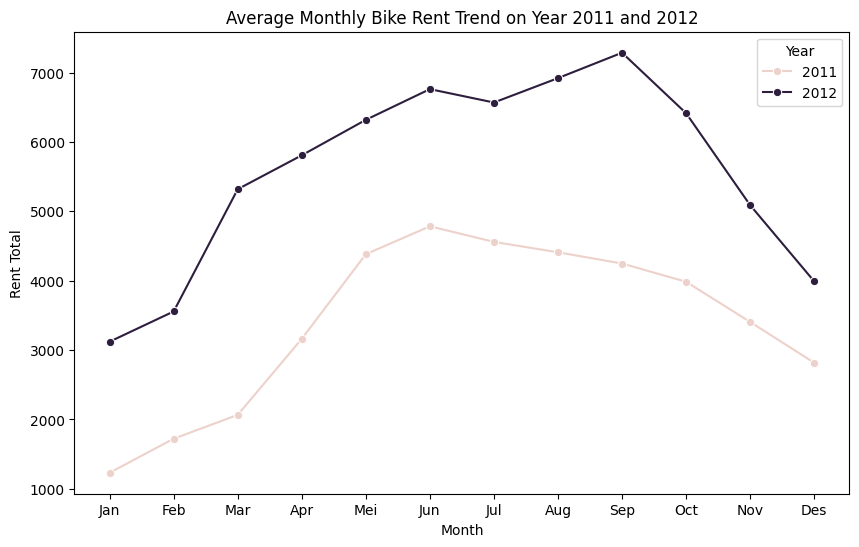

In [21]:
# Trend penggunaan sepeda bulanan di tahun 2011 dan 2012
monthly_trend = main_days_df.groupby(['year', "month"])["rent_count"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='month', y='rent_count', hue='year', data=monthly_trend, marker='o')
plt.title('Average Monthly Bike Rent Trend on Year 2011 and 2012')
plt.xlabel('Month')
plt.ylabel('Rent Total')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Des'])
plt.legend(title='Year')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15864\3251242530.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_trend = main_days_df.groupby(['year', "season"])["rent_count"].mean().reset_index()


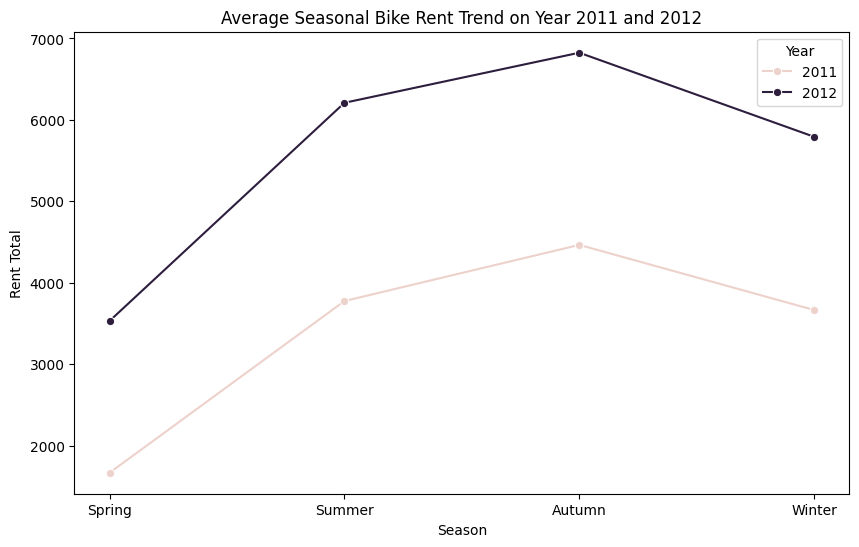

In [22]:
# Seasonal Trend
seasonal_trend = main_days_df.groupby(['year', "season"])["rent_count"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='season', y='rent_count', hue='year', data=seasonal_trend, marker='o')
plt.title('Average Seasonal Bike Rent Trend on Year 2011 and 2012')
plt.xlabel('Season')
plt.ylabel('Rent Total')

plt.legend(title='Year')
plt.show()

### Pertanyaan 2: Bagaimana kondisi musim dan cuaca dapat mempengaruhi rata-rata pengguna sepeda per harinya?

C:\Users\HP\AppData\Local\Temp\ipykernel_15864\1335721673.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_15864\1335721673.py:10: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_15864\1335721673.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_15864\1335721673.py:23: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


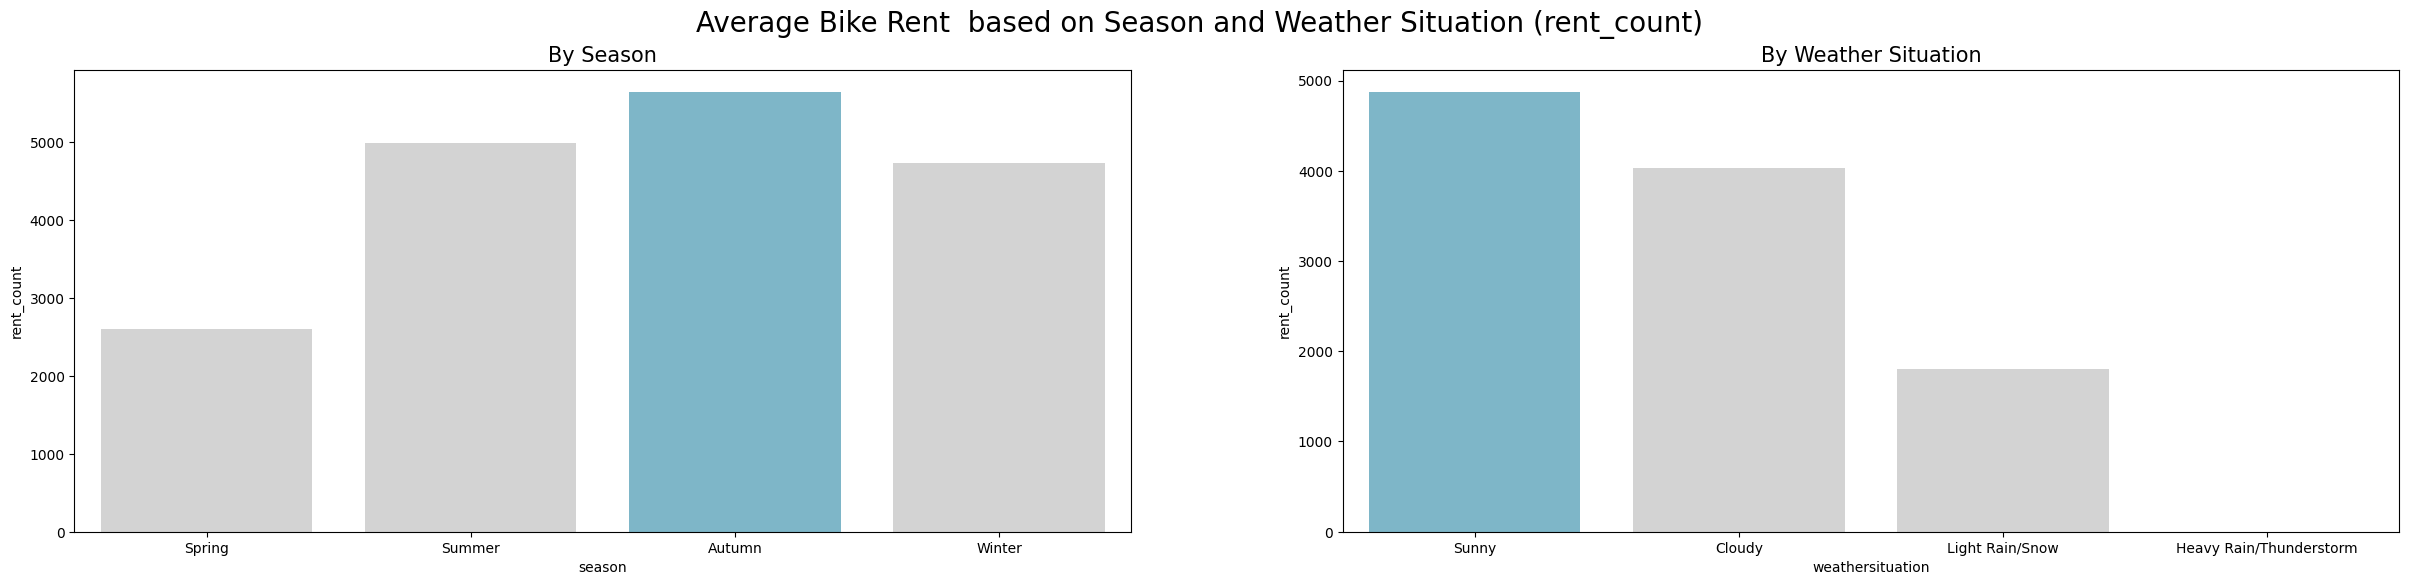

In [23]:
# Kondisi Musim dan Cuaca dalam peminjaman sepeda
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

main_days_df.rename(columns={
    "count": "rent_count"
},inplace=True)

colors=  ["#D3D3D3",  "#D3D3D3","#72BCD4", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="rent_count",
    x="season",
    data=main_days_df,
    estimator="mean",
    palette=colors,
    errorbar=None,
    ax=ax[0]
)
ax[0].set_title("By Season", loc="center", fontsize=15)

colors=  ["#72BCD4","#D3D3D3",  "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="rent_count",
    x="weathersituation",
    data=main_days_df,
    estimator="mean",
    palette=colors,
    errorbar=None,
    ax=ax[1]
)
ax[1].set_title("By Weather Situation", loc="center", fontsize=15)

plt.suptitle("Average Bike Rent  based on Season and Weather Situation (rent_count)", fontsize=20)
plt.show()


### Pertanyaan 3: Pada hari apa jumlah peminjaman sepeda melonjak tinggi?

C:\Users\HP\AppData\Local\Temp\ipykernel_15864\4203714541.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday", y="rent_count", data=main_days_df, estimator="sum",errorbar=None, palette=colors)
C:\Users\HP\AppData\Local\Temp\ipykernel_15864\4203714541.py:9: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="weekday", y="rent_count", data=main_days_df, estimator="sum",errorbar=None, palette=colors)


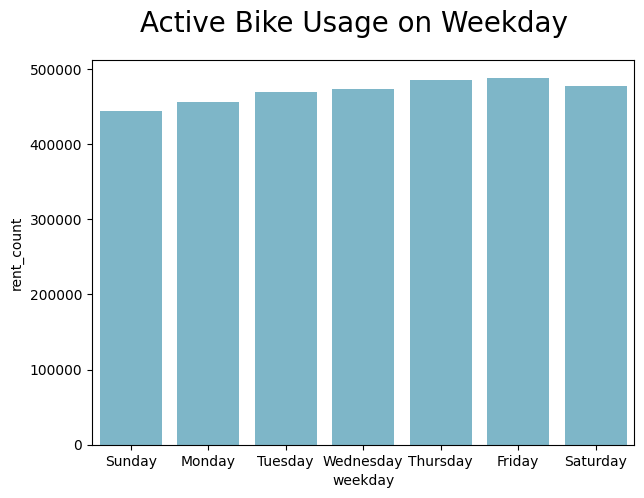

In [24]:
# Hari aktif peminjaman pada pengguna dalam satu minggu
plt.subplots(figsize=(7,5))



colors= ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]


sns.barplot(x="weekday", y="rent_count", data=main_days_df, estimator="sum",errorbar=None, palette=colors)

plt.grid(False)
plt.suptitle("Active Bike Usage on Weekday", fontsize=20)
plt.show()

### Pertanyaan 4:  Kapan waktu meningkat peminjaman sepeda yang terjadi dalam satu hari?

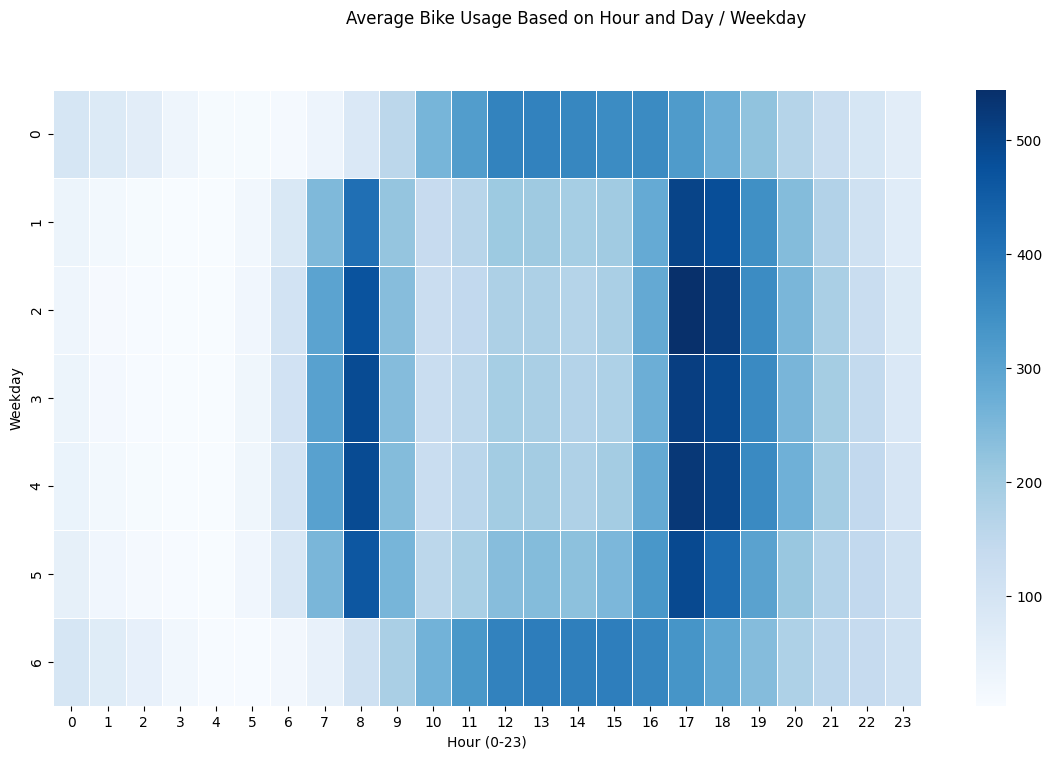

In [25]:
# Waktu peningkatan jumlah peminjam dalam satu hari
plt.figure(figsize=(14, 8))  # Mengatur ukuran figure
hourly_usage = main_hours_df.pivot_table(index='weekday', columns='hour', values='rent_count', aggfunc='mean')



# Membuat heatmap
sns.heatmap(hourly_usage, cmap='Blues', linewidths=0.5)
plt.xlabel('Hour (0-23)')
plt.ylabel('Weekday')
plt.suptitle('Average Bike Usage Based on Hour and Day / Weekday ')
plt.show()

**Insight:**
- Peminjaman sepeda di tahun 2011 dan 2012 mengalami peningkatan secara perlahan sehingga memiliki traffic tinggi pada bulan Juni. Namun,di tahun 2011 mengalami penurunan secara linear selama 2 kuartal / 6 bulan akhir. Sedangkan di tahun 2012 mengalami penurunan tetapi di bulan Juli sebesar 40% dari peningkatan terbesar pada bulan Juni, lalu mengalami peningkatan lagi sebanyak 45% di bulan Agustus dan September tetapi mengalami penurunan secara linear pada 3 bulan terakhir.
- Umumya pengguna menggunakan sepeda di awal musim Panas, tetapi pada pertengahan musim Gugur mengalami peningkatan cukup signitifikan, dan hampir pengguna memakai sepda pada saat cuaca Cerah, namun ketika pada saat Badai dan Hujan Lebat tidak ada satupun orang yang menggunakan sepeda.
- Kebanyakan orang menyewa sepeda terjadi di hari Selasa, Rabu, dan Sabtu, akan tetapi pada hari Kamis & Jum'at jumlah orang ingin menyewa sepeda mengalami kepadatan.
-  Mostly orang memakai sepeda di jam hari kerja, yaitu:
  - Jam Berangkat Kerja (7.00 s.d 9.00)
  - Jam Pulang Kerja (17.00 s.d 20.00), akan tetapi di hari jum"at hanya sampai jam 19.00 saja
- Hari libur pengguna akan memakai sepeda di jam (10.00 s.d 19.00) untuk melakukan kegiatan liburan.

## Analisis Lanjutan - Analisa Clustering Pengguna (Casual & Registered)

In [26]:
# Trend Penyewaan Bulanan  di tahun 2011 dan 2012


# Casual User
monthly_trend_by_casual = main_days_df.groupby(['year', "month"]).agg({
    "casual" : ["mean", "sum", "max"]
})

monthly_trend_by_casual

casual             
                   mean    sum   max
year month                          
2011 1        99.129032   3073   331
     2       222.928571   6242   694
     3       413.741935  12826  1424
     4       744.866667  22346  1965
     5      1001.612903  31050  2355
     6      1020.400000  30612  1920
     7      1175.870968  36452  3065
     8       930.387097  28842  1914
     9       884.833333  26545  2521
     10      813.612903  25222  2397
     11      519.800000  15594  1275
     12      272.516129   8448   706
2012 1       289.322581   8969  1070
     2       300.724138   8721  1435
     3      1019.935484  31618  3155
     4      1281.866667  38456  3252
     5      1426.935484  44235  3410
     6      1443.133333  43294  2963
     7      1345.322581  41705  2562
     8      1393.451613  43197  2827
     9      1459.266667  43778  3160
     10     1114.129032  34538  3031
     11      700.300000  21009  2290
     12      427.258065  13245  1153

In [27]:
# Registered User
monthly_trend_by_registered = main_days_df.groupby(['year', "month"]).agg({
    "registered" : ["mean", "sum", "max"]
})

monthly_trend_by_registered

registered              
                   mean     sum   max
year month                           
2011 1      1132.774194   35116  1844
     2      1499.035714   41973  2348
     3      1652.225806   51219  2355
     4      2417.466667   72524  3722
     5      3379.709677  104771  4238
     6      3763.333333  112900  4488
     7      3383.516129  104889  4220
     8      3479.000000  107849  4614
     9      3362.433333  100873  4372
     10     3170.612903   98289  4267
     11     2885.766667   86573  3891
     12     2544.354839   78875  3672
2012 1      2831.451613   87775  4185
     2      3255.724138   94416  4546
     3      4298.612903  133257  5893
     4      4525.600000  135768  5950
     5      4891.290323  151630  6433
     6      5317.866667  159536  6456
     7      5222.645161  161902  6790
     8      5526.000000  171306  6541
     9      5826.500000  174795  6946
     10     5300.096774  164303  6911
     11     4388.500000  131655  5520
     12     3563.483871  110468  6055

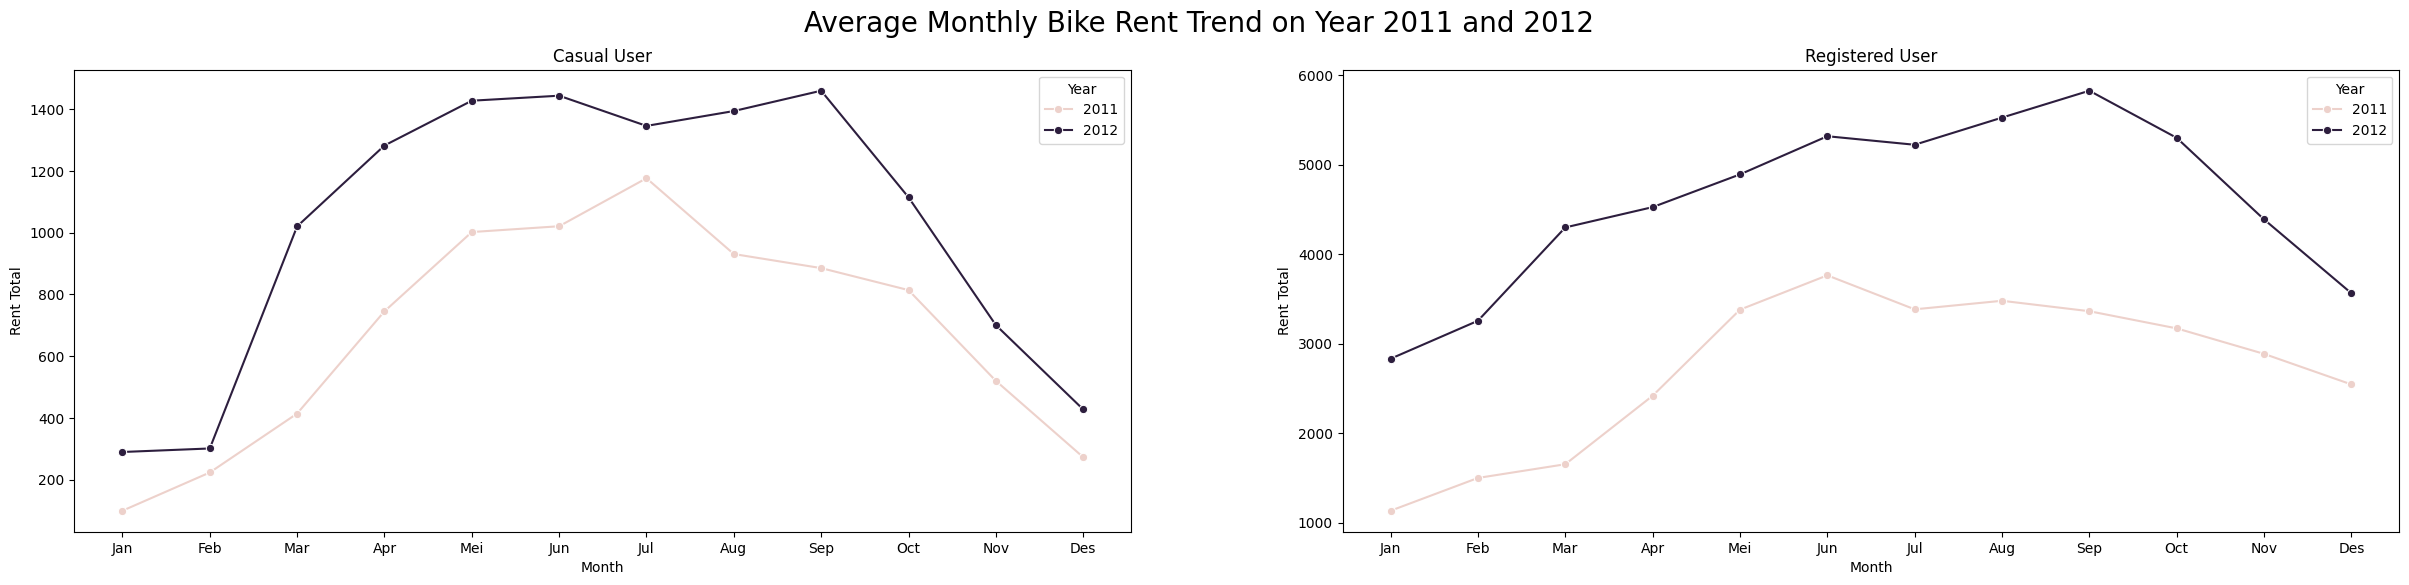

In [28]:
# Visualisasi Trend Bulanan
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

# Casual User
monthly_trend_by_casual = main_days_df.groupby(['year', "month"])["casual"].mean().reset_index()

# Registered User
monthly_trend_by_registered = main_days_df.groupby(['year', "month"])["registered"].mean().reset_index()

# Line plot casual user
sns.lineplot(x='month', y='casual', hue='year', data=monthly_trend_by_casual, marker='o', ax=ax[0])

ax[0].set_title('Casual User')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Rent Total')
ax[0].set_xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Des'])
ax[0].legend(title='Year')

# Line plot registered user
sns.lineplot(x='month', y='registered', hue='year', data=monthly_trend_by_registered, marker='o', ax=ax[1])

ax[1].set_title('Registered User')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Rent Total')
ax[1].set_xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Des'])
ax[1].legend(title='Year')


plt.suptitle('Average Monthly Bike Rent Trend on Year 2011 and 2012', fontsize=20)
plt.show()

In [29]:
# # Trend Penyewaan Musiman  di tahun 2011 dan 2012


# Casual User
seasonal_trend_by_casual = main_days_df.groupby(['year', "season"]).agg({
    "casual": ["mean", "sum"]
})
seasonal_trend_by_casual


C:\Users\HP\AppData\Local\Temp\ipykernel_15864\2241340146.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_trend_by_casual = main_days_df.groupby(['year', "season"]).agg({


casual        
                    mean     sum
year season                     
2011 Spring   238.055556   21425
     Summer   843.086957   77564
     Autumn  1015.425532   95450
     Winter   593.404494   52813
2012 Spring   430.736264   39197
     Summer  1369.108696  125958
     Autumn  1389.797872  130641
     Winter   864.820225   76969

In [30]:
# Registered User
seasonal_trend_by_registered = main_days_df.groupby(['year', "season"]).agg({
    "registered" : ["mean", "sum"]
})

seasonal_trend_by_registered

C:\Users\HP\AppData\Local\Temp\ipykernel_15864\2010782606.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_trend_by_registered = main_days_df.groupby(['year', "season"]).agg({


registered        
                    mean     sum
year season                     
2011 Spring  1428.611111  128575
     Summer  2932.086957  269752
     Autumn  3448.936170  324200
     Winter  3071.056180  273324
2012 Spring  3100.560440  282151
     Summer  4840.380435  445315
     Autumn  5434.446809  510838
     Winter  4927.044944  438507

C:\Users\HP\AppData\Local\Temp\ipykernel_15864\3883607747.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_trend_by_casual = main_days_df.groupby(['year', "season"])["casual"].mean().reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_15864\3883607747.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_trend_by_registered = main_days_df.groupby(['year', "season"])["registered"].mean().reset_index()


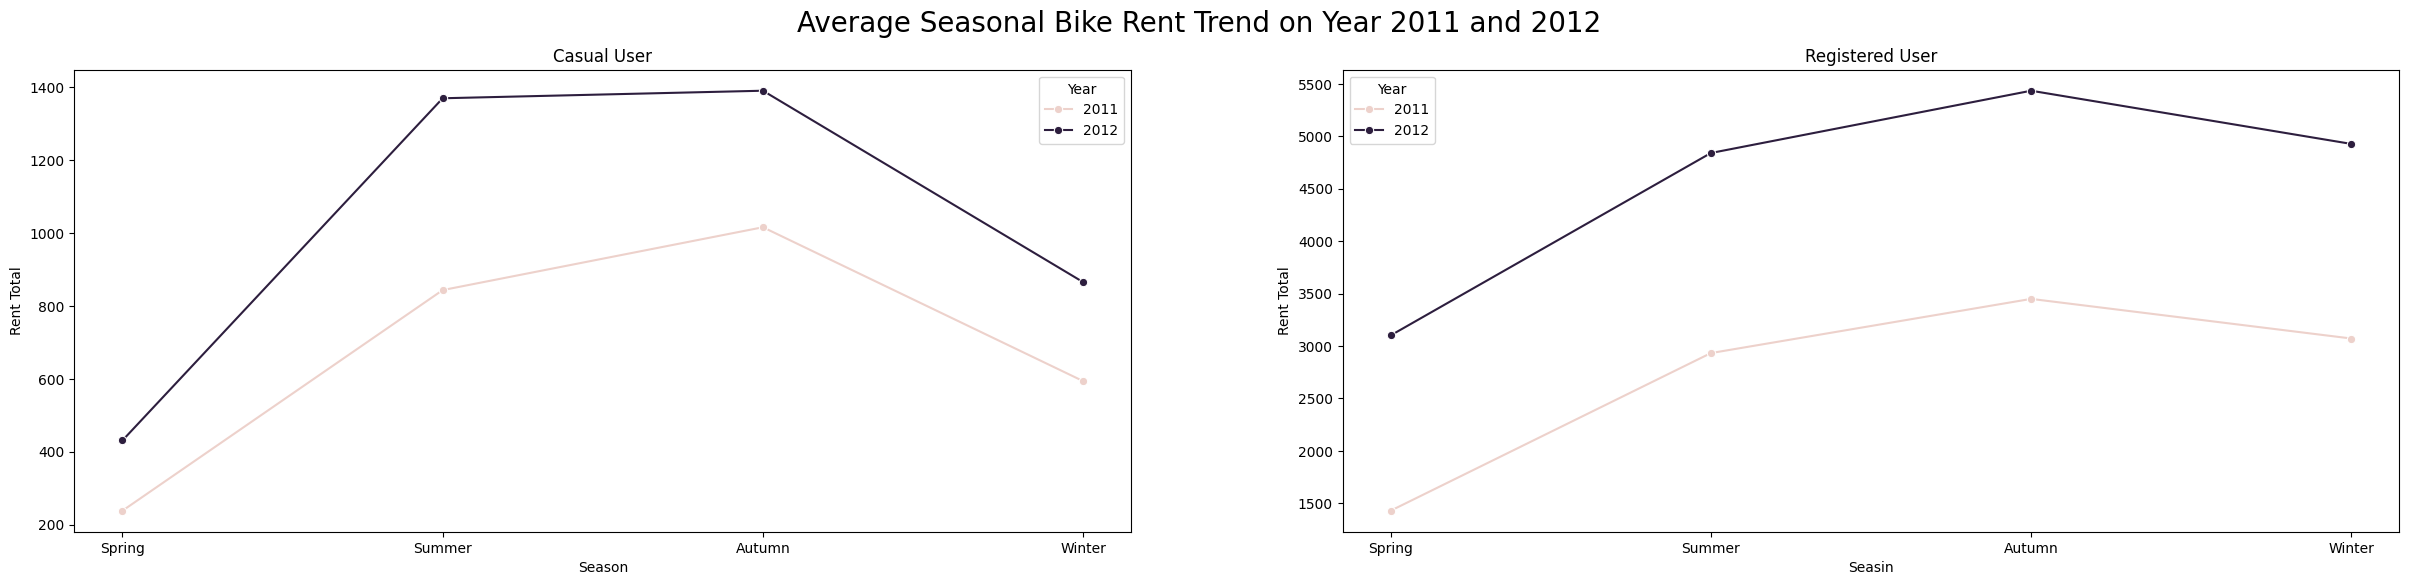

In [31]:
# Visualisasi Trend Musiman
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

# Casual User
seasonal_trend_by_casual = main_days_df.groupby(['year', "season"])["casual"].mean().reset_index()

# Registered User
seasonal_trend_by_registered = main_days_df.groupby(['year', "season"])["registered"].mean().reset_index()

# Line plot casual user
sns.lineplot(x='season', y='casual', hue='year', data=seasonal_trend_by_casual, marker='o', ax=ax[0])

ax[0].set_title('Casual User')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Rent Total')
ax[0].legend(title='Year')

# Line plot registered user
sns.lineplot(x='season', y='registered', hue='year', data=seasonal_trend_by_registered, marker='o', ax=ax[1])

ax[1].set_title('Registered User')
ax[1].set_xlabel('Seasin')
ax[1].set_ylabel('Rent Total')
ax[1].legend(title='Year')


plt.suptitle('Average Seasonal Bike Rent Trend on Year 2011 and 2012', fontsize=20)
plt.show()

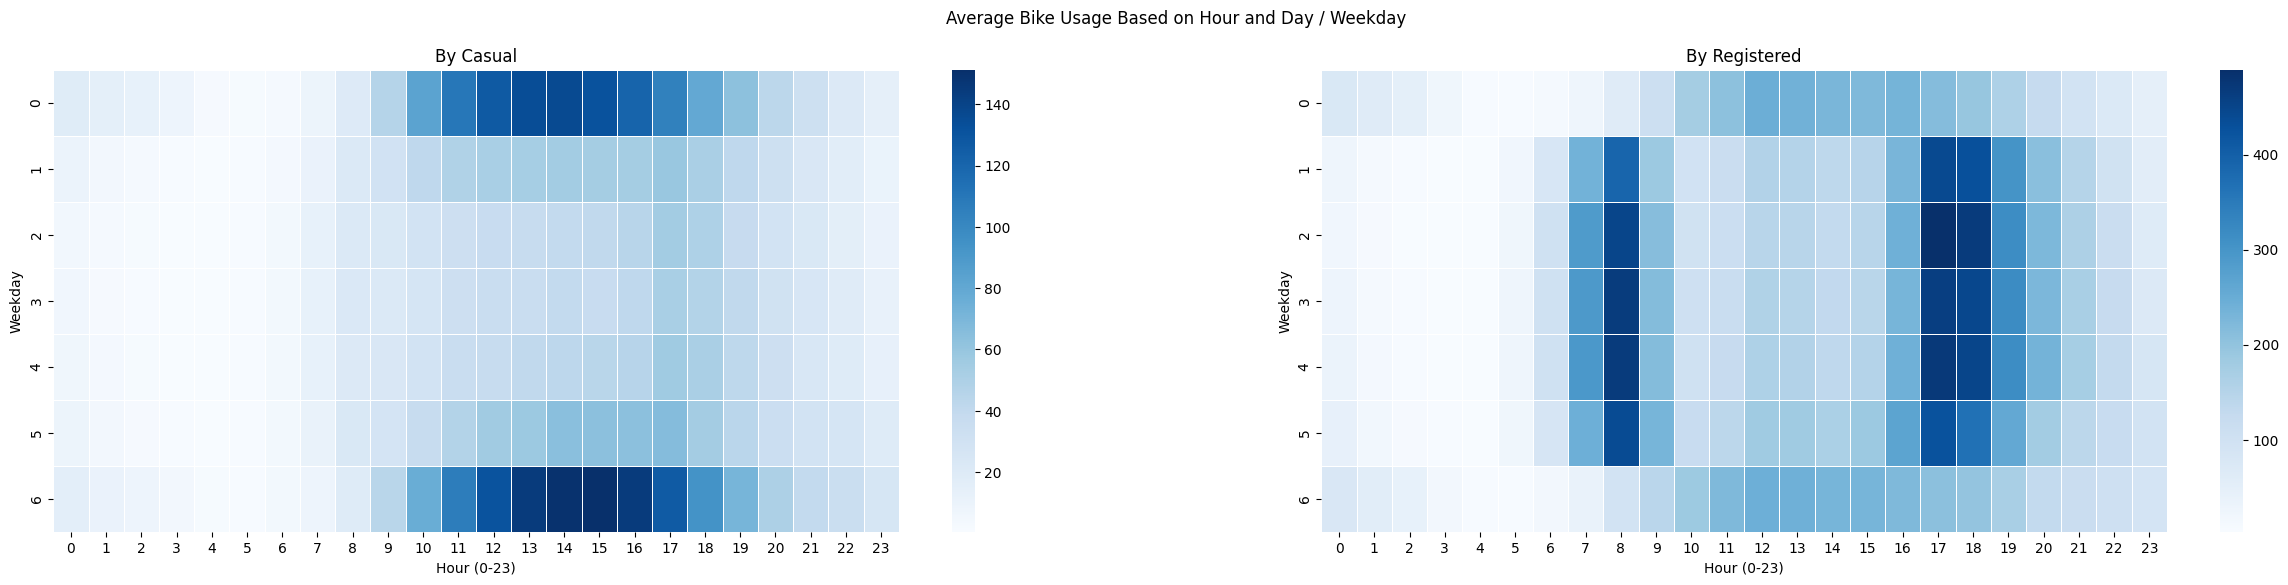

In [32]:
# Waktu peningkatan jumlah peminjam biasa dalam satu hari
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

hourly_usage_by_casual = main_hours_df.pivot_table(index='weekday', columns='hour', values='casual', aggfunc='mean')
hourly_usage_by_registered = main_hours_df.pivot_table(index='weekday', columns='hour', values='registered', aggfunc='mean')



# Membuat heatmap
sns.heatmap(hourly_usage_by_casual, cmap='Blues', linewidths=0.5, ax=ax[0])
ax[0].set_title('By Casual')
ax[0].set_xlabel('Hour (0-23)')
ax[0].set_ylabel('Weekday')

sns.heatmap(hourly_usage_by_registered, cmap='Blues', linewidths=0.5, ax=ax[1])
ax[1].set_title('By Registered')
ax[1].set_xlabel('Hour (0-23)')
ax[1].set_ylabel('Weekday')



plt.suptitle('Average Bike Usage Based on Hour and Day / Weekday ')
plt.show()

In [33]:
main_days_df.to_csv('dashboard/main_days.csv', index=False)

In [34]:
main_hours_df.to_csv('dashboard/main_hours.csv', index=False)

## Conclusion

- Conclution pertanyaan 1

> Peminjaman sepeda di tahun 2011 dan 2012 mengalami peningkatan secara perlahan sehingga memiliki traffic tinggi pada bulan Juni. Namun,di tahun 2011 mengalami penurunan secara linear selama 2 kuartal / 6 bulan akhir. Sedangkan di tahun 2012 mengalami penurunan tetapi di bulan Juli sebesar 40% dari peningkatan terbesar pada bulan Juni, lalu mengalami peningkatan lagi sebanyak 45% di bulan Agustus dan September tetapi mengalami penurunan secara linear pada 3 bulan terakhir. Jumlah pengguna terbanyak dalam menyewa sepeda yaitu pengguna terdaftar sebanyak 112.900 pada tahun 2011 dan 174.795 pada tahun 2012.


- Conclution pertanyaan 2

> Umumya semua pengguna menggunakan sepeda di awal musim Panas, tetapi pada pertengahan musim Gugur mengalami peningkatan cukup signitifikan, tetapi ada peningkatan besar jumlah peminjaman pada pengguna terdaftar saat musim dingin. Semua pengguna memakai sepeda pada saat cuaca Cerah, namun ketika pada saat Badai dan Hujan Lebat tidak ada satupun orang yang menggunakan sepeda.

- Conclution pertanyaan 3

> Mayoritas orang menyewa sepeda terjadi di hari Selasa, Rabu, dan Sabtu, akan tetapi pada hari Kamis & Jum'at mengalami traffic tinggi jumlah peminjaman. Bagi pengguna biasa dan terdaftar memiliki jadwal tersendiri dalam meminjam sepeda dalam jumlah besar, Bagi pengguna terdaftar umumnya saat weekday atau hari kerja yaitu Senin-Jum"at dan  pengguna biasa umumnya saat weekend atau hari libur yaitu Sabtu & Minggu.

- Conclution pertanyaan 4

> Pada pengguna biasa dan terdaftar/member memiliki jam tersendiri dalam menggunakan sepeda:
 - pengguna member mostly memakai sepeda di jam hari kerja, yaitu:
Jam Berangkat Kerja (7.00 s.d 9.00) dan Jam Pulang Kerja (17.00 s.d 20.00), akan tetapi di hari jum"at hanya sampai jam 19.00 saja
 - sedangkan pengguna biasa mostly memakai sepeda di hari libur pengguna akan memakai sepeda di jam (10.00 s.d 19.00) untuk melakukan kegiatan liburan.


